# Predict Heart Disease in a patient

### 1. Get the data 
* From the Kaggle or UCI Datasets


#### Data Description:

age : age in years

sex : (1 = male; 0 = female)

cp : chest pain type

trestbps : resting blood pressure (in mm Hg on admission to the hospital)

chol : serum cholestoral in mg/dl

fbs : (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

restecg : resting electrocardiographic results

thalach : maximum heart rate achieved

exang : exercise induced angina (1 = yes; 0 = no)

oldpeak : ST depression induced by exercise relative to rest

slope : the slope of the peak exercise ST segment

ca : number of major vessels (0-3) colored by flourosopy

thal : 3 = normal; 6 = fixed defect; 7 = reversable defect

target : 1 or 0

## Get the tools ready

In [41]:
# Import all the libraries

# Regular EDA (Exploratory Data Ananlysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



## Load Data

In [2]:
df = pd.read_csv('data/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (Exploratory Data Analysis or EDA)

Find more about data

1. What question are we trying to solve?
2. What kind of Data do we have and how do we treat diffrnt types of data ?
3. What is missing from data and how to deal with it ?
4. Where are the outliers, and why to care ?
5. How can you add, change or remove features to get more out of the data ?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Find out class types
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

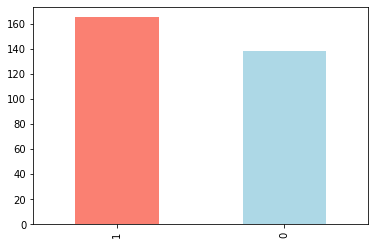

In [6]:
# Visulaize the data
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Heart Disease frequency acc. to Sex

In [10]:
df.sex.value_counts(), df.target.value_counts()

(1    207
 0     96
 Name: sex, dtype: int64,
 1    165
 0    138
 Name: target, dtype: int64)

In [11]:
# Visualize both columns with crosstab
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


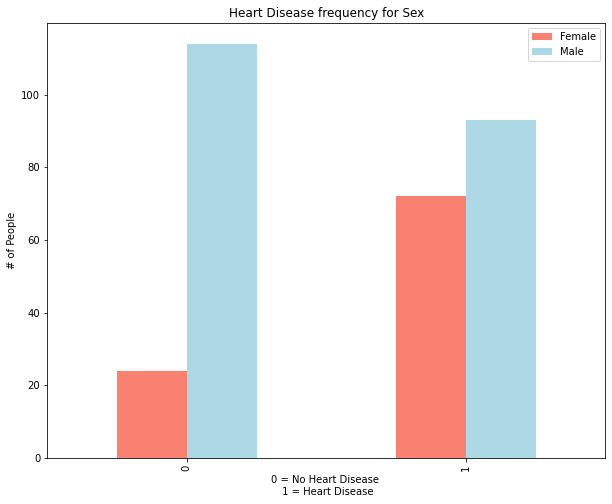

In [12]:
# Creating a plot for crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10,8),
                                    color=['salmon', 'lightblue']);

plt.title('Heart Disease frequency for Sex')
plt.xlabel('0 = No Heart Disease \n 1 = Heart Disease')
plt.ylabel('# of People')
plt.legend(['Female', 'Male']);

### Age vs Max Heart Rate plot

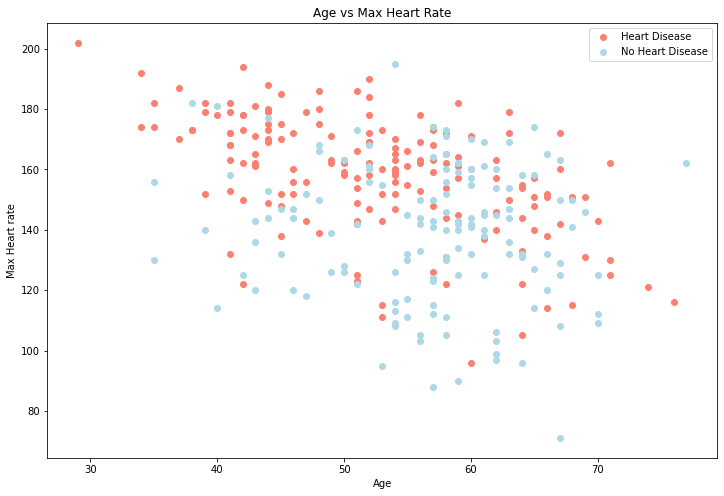

In [13]:
plt.figure(figsize=(12,8))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')

plt.title('Age vs Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart rate')
plt.legend(['Heart Disease', 'No Heart Disease']);


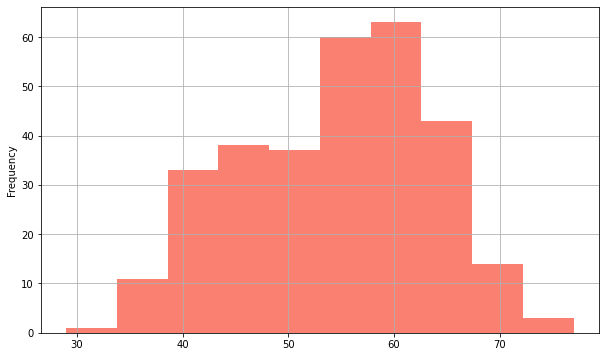

In [14]:
plt.figure(figsize=(10,6))
df.age.plot.hist(color='salmon');
plt.grid()

### Heart Disease freq vs Chest Pain (CP)
cp: chest pain type
   * Value 1: typical angina
   * Value 2: atypical angina
   * Value 3: non-anginal pain
   * Value 4: asymptomatic

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


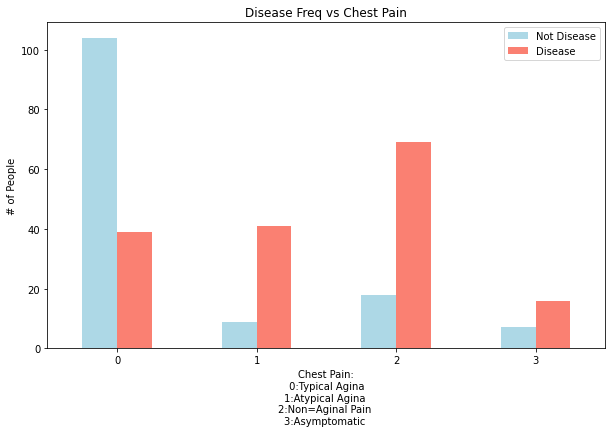

In [16]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['lightblue', 'salmon'])

plt.title('Disease Freq vs Chest Pain')
plt.xlabel('Chest Pain:\n 0:Typical Agina \n1:Atypical Agina \n2:Non=Aginal Pain \n3:Asymptomatic ')
plt.ylabel('# of People')
plt.legend(['Not Disease', 'Disease']);
plt.xticks(rotation=0);

In [73]:
# Find correlation between columns
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


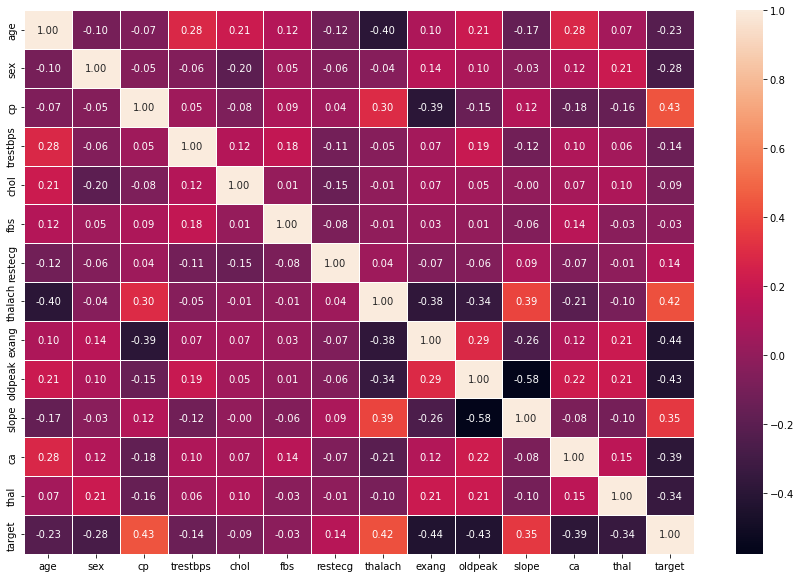

In [17]:
# Visualize the correlation
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths=0.5,
                 fmt='.2f');


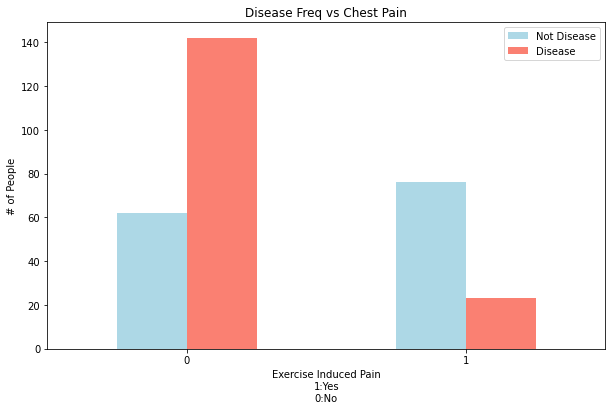

In [18]:
pd.crosstab(df.exang, df.target).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['lightblue', 'salmon'])

plt.title('Disease Freq vs Chest Pain')
plt.xlabel('Exercise Induced Pain\n1:Yes\n0:No')
plt.ylabel('# of People')
plt.legend(['Not Disease', 'Disease']);
plt.xticks(rotation=0);

## Modeling

In [19]:
# Split data

X = df.drop('target', axis=1)
y = df['target']

In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


### Try 3 models

In [23]:
# Put models in a dict
models = {
    'Logistics Regressor': LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'RandomForest' : RandomForestClassifier()
}

#Function to try all models and scroe them

def fit_n_score(models, X_train, X_test, y_train, y_test):
    
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores


In [24]:
model_scores = fit_n_score(models, X_train, X_test, y_train, y_test)

model_scores

W:\Code\Machine_Learning\PROJECTS\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistics Regressor': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

### Model Comparison

In [25]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare

,Logistics Regressor,KNN,RandomForest
Accuracy,0.885246,0.688525,0.836066


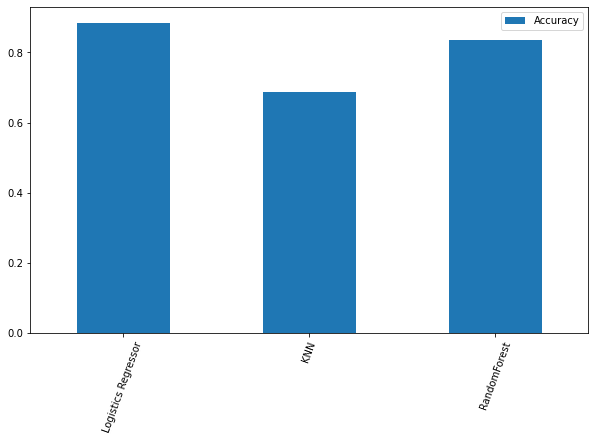

In [26]:
model_compare.T.plot.bar(figsize=(10,6))
plt.xticks(rotation=70);

Tune paramter of KNN Model

In [122]:
# Tuning n_neighbors parameter

# Creating list to store train and test scores
train_scores = []
test_scores = []

# Neighbors range
neighbors = range(1, 21)

# Instantiating model
knn = KNeighborsClassifier()

# Trying KNN model for a range of n_neighbors through a loop
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [123]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [124]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum Accuracy of Test Score: 75.41%


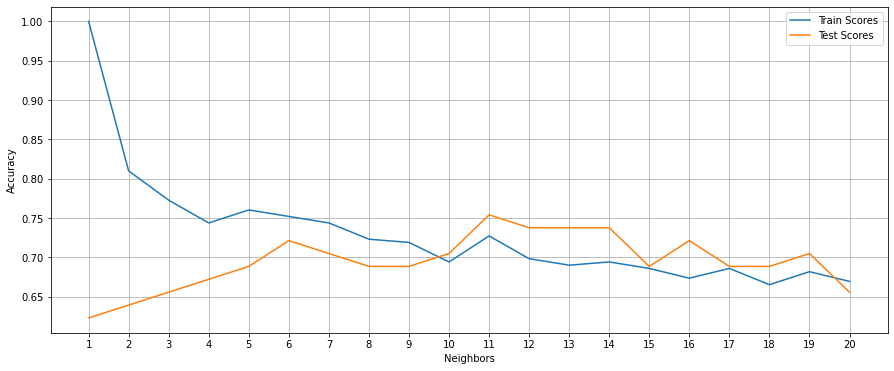

In [147]:
plt.figure(figsize=(15,6))
plt.plot(neighbors, train_scores, label='Train Scores')
plt.plot(neighbors, test_scores, label='Test Scores')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.legend();

print(f'Maximum Accuracy of Test Score: {max(test_scores)*100:.2f}%')

In [150]:
# Tune hyperparameters of Logistic Regression and RandomForestClassifier


log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


In [151]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=2)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [152]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [153]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [154]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=2)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_de

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [155]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [156]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [157]:
# Logistic Regression shows the best result, thus we will eliminate other two estimators.
# And tune the parameters of logistic Regression using GridSearchCV

In [29]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=2)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, sol

[CV] END ..............C=32.90344562312671, solver=liblinear; total time=   0.0s
[CV] END ..............C=32.90344562312671, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=221.

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [30]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [31]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [33]:
# Evaluate the model

y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

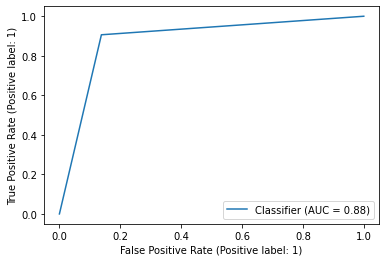

In [37]:
# Plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_preds);

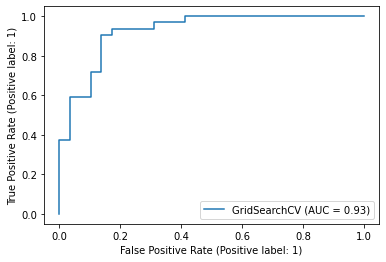

In [39]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

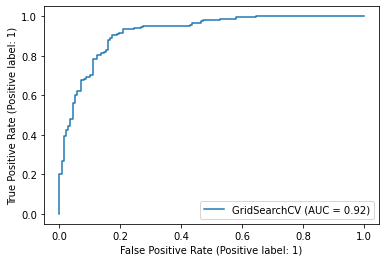

In [40]:
RocCurveDisplay.from_estimator(gs_log_reg, X, y);

In [53]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_preds, labels=gs_log_reg.classes_)
cm

array([[25,  4],
       [ 3, 29]], dtype=int64)

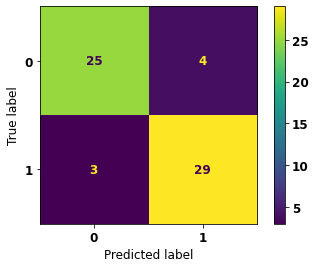

In [101]:
# plt.figure(figsize=(10,10))
# font = {'size'   : 12}
# plt.rc('font', **font)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs_log_reg.classes_)
disp.plot();

In [66]:
#Classificatio Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [67]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [68]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver = 'liblinear')

In [70]:
# Cross validating all scores:  Accuracy, Precision, Recall, F1
def cross_val_score_dict(metric_list):
    cross_val_scores = {}
    for i in metric_list:
        cv = cross_val_score(clf,
                         X,
                         y,
                         scoring=i)
        cross_val_scores[i] = np.mean(cv)
    return cross_val_scores

In [72]:
metric_list = ["accuracy", "precision", "recall", "f1"]
scores = cross_val_score_dict(metric_list)
scores

{'accuracy': 0.8446994535519124,
 'precision': 0.8207936507936507,
 'recall': 0.9212121212121213,
 'f1': 0.8673007976269721}

In [84]:
cv_metrics = pd.DataFrame(scores,
                          index=['%'])
cv_metrics

,accuracy,precision,recall,f1
%,0.844699,0.820794,0.921212,0.867301


W:\Code\Machine_Learning\PROJECTS\heart-disease-project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


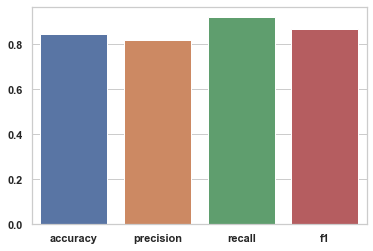

In [123]:
# plt.figure(figsize=(10,12))
# cv_met = sns.load_dataset("cv_metrics")
sns.set(style="whitegrid")#, color_codes=True)
sns.barplot(list(scores.keys()), list(scores.values()));

# plt.show();

In [127]:
array = np.array([4,2,7,1])
order = array.argsort()
ranks = order.argsort()
order

array([3, 1, 0, 2], dtype=int64)